In [1]:
#Import Pandas library to manipulate the data
import pandas as pd



# Data Loading

In [2]:
#Import the data from the excel file and show it
df = pd.read_excel('dataset.xlsx')
df.info()
print("+++++++++++++++++")
print(df.describe())
print("+++++++++++++++++")
print(df.columns)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   Country Name                                                                           217 non-null    object
 1   Country Code                                                                           217 non-null    object
 2   GDP growth                                                                             217 non-null    object
 3   GDP per capita                                                                         217 non-null    object
 4   Inflation consumer prices (annual %)                                                   217 non-null    object
 5   Trade (% of GDP)                                                                      

# Data Preprocessing

In [3]:
#Delete the unuseful columns
del df['Unemployment with advanced education (% of total labor force with advanced education)']
del df['GDP per capita']


In [4]:
#Rename the columns GDP growth,Inflation consumer prices (annual %),Trade (% of GDP)
df.columns = ['GDP' if col == 'GDP growth' else 
              'Inflation' if col == 'Inflation consumer prices (annual %)' else 
              'Trade' if col == 'Trade (% of GDP)' else col for col in df.columns]
print(df.columns)


Index(['Country Name', 'Country Code', 'GDP', 'Inflation', 'Trade'], dtype='object')


In [5]:
print(df.columns)
# Calculate the avreage of each columns while
# excluding the null values referred by '..'.

# Iterate over the cells and calculate their sum
# while incrementing a counter to track the number of
# rows containing values then deviding the sum by the counter

# Calculate the avg of GDP
sum_GDP = 0
i = 0
for value in df['GDP']:
    if (value != '..'): #excludes the empty values
        sum_GDP += value
        i+=1
avg_GDP = sum_GDP/i

# Calculate the avg of Inflation
sum_Inflation = 0
j = 0
for value in df['Inflation']:
    if (value != '..'):
        sum_Inflation += value
        j+=1
avg_Inflation = sum_Inflation/j

# Calculate the avg of Trade
sum_Trade = 0
k = 0
for value in df['Trade']:
    if (value != '..'):
        sum_Trade += value
        k+=1
avg_Trade = sum_Trade/k


# <!> the average of each column might be calculated using mean()
# prdefined function of pandas but here its not applicable because our columns 
# containes string values '..'

print("avg_GDP using loop:", avg_GDP)
print("avg_Inflation using loop:", avg_Inflation)
print("avg_Trade using loop:", avg_Trade)

Index(['Country Name', 'Country Code', 'GDP', 'Inflation', 'Trade'], dtype='object')
avg_GDP using loop: -5.065449234361873
avg_Inflation using loop: 8.057423512647146
avg_Trade using loop: 84.36905428635443


In [6]:
# Replace every '..' contained in 
# a column by the average of the column
df.loc[df['GDP'] == '..', 'GDP'] = avg_GDP
df.loc[df['Inflation'] == '..', 'Inflation'] = avg_Inflation
df.loc[df['Trade'] == '..', 'Trade'] = avg_Trade


In [7]:
# Create a new column named EGL.

# For each row we check the value of the GDP and based on that 
# we populate the data by the corresponding description 

for index, value in df.iterrows():
    if value['GDP'] <= 1:
        df.loc[index, 'EGL'] = 'low GDP'
    elif  1 <= value['GDP'] <= 3:
        df.loc[index, 'EGL'] = 'medium GDP'
    elif  3 <= value['GDP'] <= 5:
        df.loc[index, 'EGL'] = 'high GDP'
    else :
        df.loc[index, 'EGL'] = 'very high GDP'
  

/var/folders/v1/t9hc1nss39sdpgmpmzkqw0q40000gn/T/ipykernel_80230/310448814.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'low GDP' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[index, 'EGL'] = 'low GDP'


In [8]:
# We read a specific sheet from the excel file as a new dataframe

df1 = pd.read_excel('dataset.xlsx', sheet_name='Feuil5')
df11 = pd.DataFrame(df1);


In [9]:
# We create a new column called IncomeLevel and populate it 
# with the corresponding description based on the comparison of the country name
# (it shoul be upperCased to match the format of data to compare to)

for index, value in df.iterrows():
    if value['Country Name'].upper() in df11['high income'].values:
        df.loc[index, 'Income_level'] = 'high income'
    elif value['Country Name'].upper() in df11['Low income'].values:
        df.loc[index, 'Income_level'] = 'low income'
    elif value['Country Name'].upper() in df11['Middle income'].values:
        df.loc[index, 'Income_level'] = 'middle income'


/var/folders/v1/t9hc1nss39sdpgmpmzkqw0q40000gn/T/ipykernel_80230/3676171603.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'low income' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[index, 'Income_level'] = 'low income'


In [10]:
# We search for the index of the country to replace and
# we add the new value to the country name and country code 
# located with that index

index = df[df['Country Name'] == 'Israel'].index
df.loc[index, 'Country Name'] = 'Palestine'
df.loc[index, 'Country Code'] = 'PS'

index = df[df['Country Name'] == 'Venezuela, RB'].index
df.loc[index, 'Income_level'] = 'low income'



In [11]:
df.head(215)
df.to_excel('Stream1.xlsx', index= False)


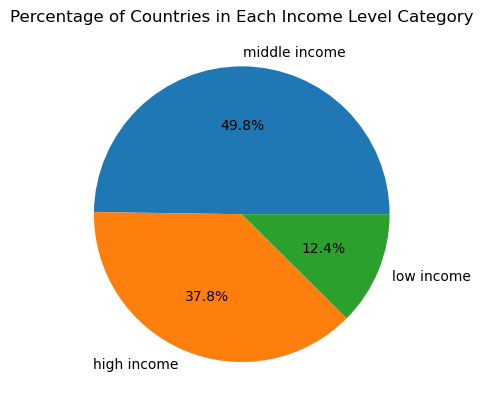

In [12]:
import matplotlib.pyplot as plt
df1 = pd.read_excel('Stream1.xlsx')

percentages = df1['Income_level'].value_counts(normalize=True) * 100

# Plotting a pie chart
plt.figure()
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.title('Percentage of Countries in Each Income Level Category')
plt.show()

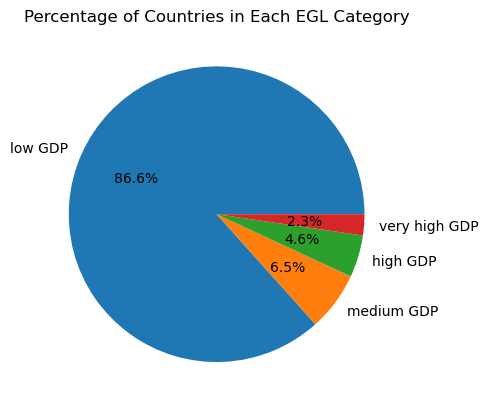

,Country Name,Country Code,GDP,Inflation,Trade,EGL,Income_level
0,Afghanistan,AFG,-2.351101,8.057424,84.369054,low GDP,low income
1,Albania,ALB,-3.302082,1.620887,59.829729,low GDP,middle income
2,Algeria,DZA,-5.1,2.415131,45.330511,low GDP,middle income
3,American Samoa,ASM,5.065359,8.057424,156.005587,very high GDP,high income
4,Andorra,AND,-11.18394,8.057424,84.369054,low GDP,high income


In [20]:
percentages = df1['EGL'].value_counts(normalize=True) * 100

# Plotting a pie chart
plt.figure()
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.title('Percentage of Countries in Each EGL Category')
plt.show()
df.head(5)

/var/folders/v1/t9hc1nss39sdpgmpmzkqw0q40000gn/T/ipykernel_80230/3757045296.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


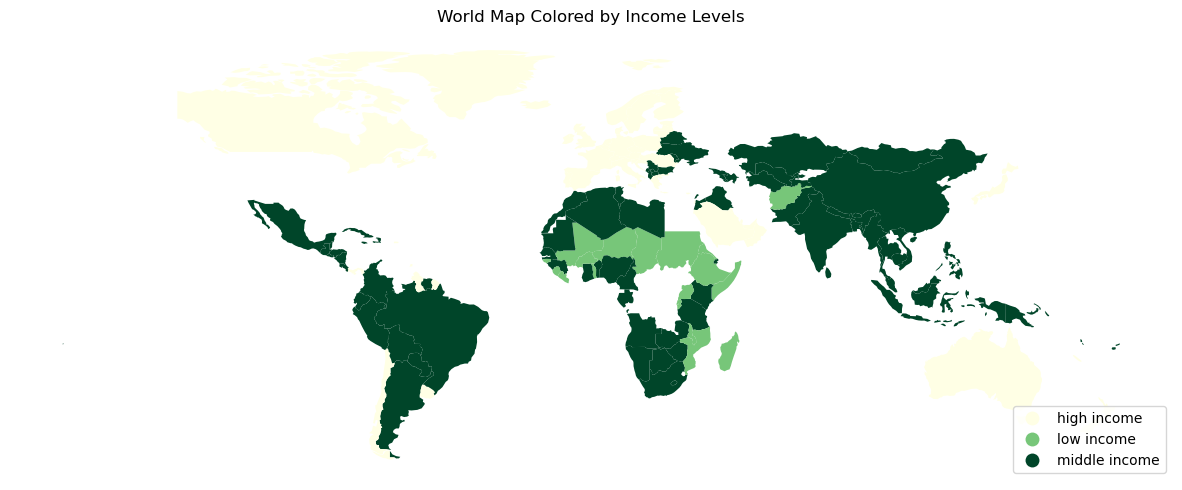

/var/folders/v1/t9hc1nss39sdpgmpmzkqw0q40000gn/T/ipykernel_80230/3757045296.py:31: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


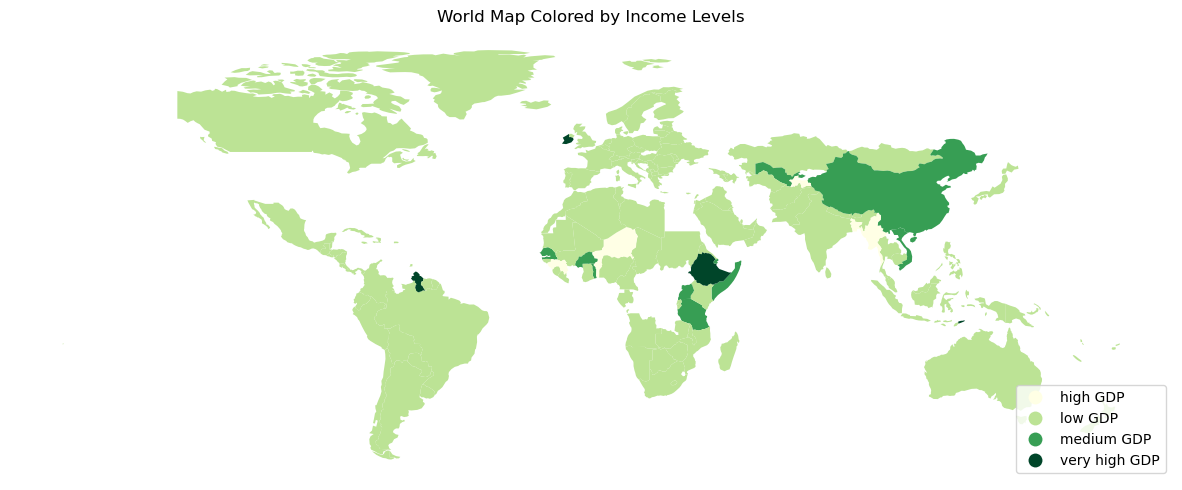

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Assume you have a dataset containing income levels per country
# For demonstration purposes, let's create a sample income level dataset


# Convert the income data to a DataFrame
income_df = pd.DataFrame(df)

# Merge the world map data with the income data based on country names
world_income = world.merge(df, how='left', left_on='name', right_on='Country Name')

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the countries and color them based on income levels
world_income.plot(column='Income_level', ax=ax, legend=True,
                  legend_kwds={'loc': 'lower right'}, cmap='YlGn')

# Customize plot settings
ax.set_title('World Map Colored by Income Levels')
plt.axis('off')  # Hide axis
plt.show()



# Stream 2

In [ ]:
grouped = df1.groupby(['Income_level', 'EGL']).size().reset_index(name='Frequency')

# Pivot the table to get a better view (reshaping the data)
pivot_table = grouped.pivot(index='Income_level', columns='EGL', values='Frequency').fillna(0)

# Display the resulting pivot table
print(pivot_table)

In [ ]:
print(df1['Income_level'].unique())
print(df1['EGL'].unique())
print(df1['Income_level'].isnull().sum())
print(df1['EGL'].isnull().sum())

In [16]:
# initialize empty Dict to hold income levels categories(key) and their frequencies(value)
# looping over the IL column; for every category, while finding an occurence,
# we increment by 1

IL_frequencies = {}
for val in df1['Income_level']:
    if val in IL_frequencies:
        IL_frequencies[val] += 1
    else:
        IL_frequencies[val] = 1

# Calculate relative frequencies for Income_level categories
# we retrive the total number of records present in IL column (total_entries)
# then for every category(key) we calculate its relative frequency
# by deviding its value of frequency by the total number of records
# we use the keys and values of the IL_frequencies

IL_total_entries = len(df1['Income_level'])
IL_relative_frequencies = {k: v / IL_total_entries for k, v in IL_frequencies.items()}


# SAME WORK HERE
EGL_frequencies = {}
for val in df1['EGL']:
    if val in EGL_frequencies:
        EGL_frequencies[val] += 1
    else:
        EGL_frequencies[val] = 1

EGL_total_entries = len(df1['EGL'])
EGL_relative_frequencies = {k: v / EGL_total_entries for k, v in EGL_frequencies.items()}



# Create the tables
stat_table1 = pd.DataFrame({
    'Income_level': list(IL_frequencies.keys()),# IL categories from the IL_frequencies dict (keys)
    'IncomeLevel_frequencies': list(IL_frequencies.values()),# IL categories frequencies from the IL_frequencies dict (values)
    'IncomeLevel_relative_frequencies': list(IL_relative_frequencies.values()),# IL categories relative frequencies from the IL_relative_frequencies dict (values)
})

stat_table2 = pd.DataFrame({
    'EGL': list(EGL_frequencies.keys()),# EGL categories from the EGL_frequencies dict (keys)
    'EGL_frequencies': list(EGL_frequencies.values()),# EGL categories frequencies from the EGL_frequencies dict (values)
    'EGL_relative_frequencies': list(EGL_relative_frequencies.values())# EGL categories relative frequencies from the EGL_relative_frequencies dict (values)
})

print(stat_table1)
print(stat_table2)


    Income_level  IncomeLevel_frequencies  IncomeLevel_relative_frequencies
0     low income                       27                          0.124424
1  middle income                      108                          0.497696
2    high income                       82                          0.377880
             EGL  EGL_frequencies  EGL_relative_frequencies
0        low GDP              188                  0.866359
1  very high GDP                5                  0.023041
2       high GDP               10                  0.046083
3     medium GDP               14                  0.064516


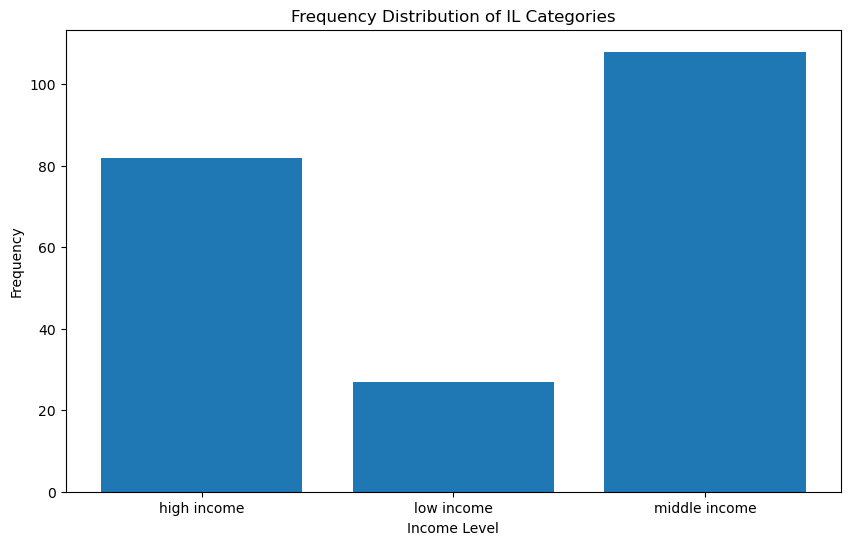

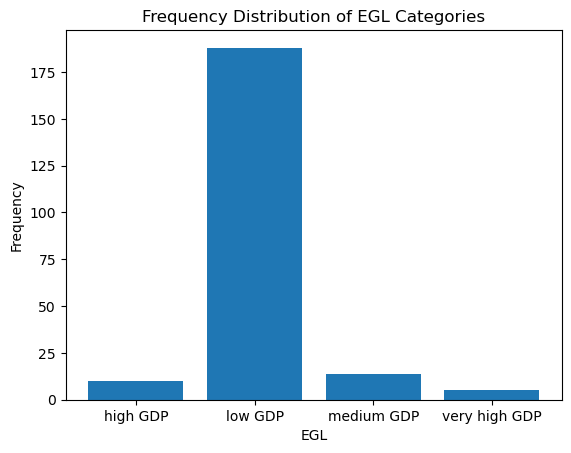

In [17]:
# Sort frequencies by keys for consistent plotting

# Income Level
sorted_IL_categories = sorted(IL_frequencies.keys())
sorted_IL_frequencies = [IL_frequencies[cat] for cat in sorted_IL_categories]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_IL_categories, sorted_IL_frequencies)
plt.xlabel('Income Level')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of IL Categories')
plt.show()

# EGL

sorted_EGL_categories = sorted(EGL_frequencies.keys())
sorted_EGL_frequencies = [EGL_frequencies[cat] for cat in sorted_EGL_categories]

# Create bar plot
plt.bar(sorted_EGL_categories, sorted_EGL_frequencies)
plt.xlabel('EGL')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of EGL Categories')
plt.show()

In [38]:

# # Assuming you have sorted frequencies for Income_level (IL) and EGL
# # sorted_IL_categories, sorted_IL_frequencies, sorted_EGL_categories, sorted_EGL_frequencies

# fig, ax = plt.subplots(figsize=(10, 6))

# bar_width = 0.35
# index = range(len(sorted_IL_categories))

# # Plotting the bars for Income_level
# bars1 = plt.bar(index, sorted_IL_frequencies, bar_width, label='Income_level')

# # Adjusting the x positions for the bars for EGL
# index = [i + bar_width for i in index]
# bars2 = plt.bar(index, sorted_EGL_frequencies, bar_width, label='EGL')

# plt.xlabel('Categories')
# plt.ylabel('Frequencies')
# plt.title('Frequency Distribution of Two Categorical Variables')
# plt.xticks([i + bar_width / 2 for i in range(len(sorted_IL_categories))], sorted_IL_categories)
# plt.legend()

# plt.tight_layout()
# plt.show()

# STEP 4&5

In [22]:
intervals = [(-60, -50), (-50, -40), (-40, -30), (-30, -20), (-20, -10), (-10, 0),(0, 10),(10, 20),
            (20, 30), (30, 40), (40, 50)]


# Calculate GDP frequencies we should map every value of gdp in its specific interval
frequencies = [0] * len(intervals)
for num in df1['GDP']:
    for i, interval in enumerate(intervals):
        lower_bound, upper_bound = interval
        if lower_bound <= num < upper_bound:
            frequencies[i] += 1
            break

# Calculate relative frequencies by deviding every interval frequency by the total observation
total_observations = len(df1['GDP'])
relative_frequencies = [(count / total_observations)  for count in frequencies]

# Calculate cumulative frequencies by adding the previous value of frequency to the actual value of cumulative frequency
cumulative_frequencies = []
cumulative_sum = 0
for count in frequencies:
    cumulative_sum += count
    cumulative_frequencies.append(cumulative_sum)

GDP_stat_table = {
    'Interval': intervals,
    'Frequency': frequencies,
    'Relative Frequency': relative_frequencies,
    'Cumulative Frequency': cumulative_frequencies
}

GDP_stat_df = pd.DataFrame(GDP_stat_table)
print('**** Displaying the statistical table of GDP ****')
print(GDP_stat_df)






**** Displaying the statistical table of GDP ****
      Interval  Frequency  Relative Frequency  Cumulative Frequency
0   (-60, -50)          1            0.004608                     1
1   (-50, -40)          0            0.000000                     1
2   (-40, -30)          1            0.004608                     2
3   (-30, -20)          6            0.027650                     8
4   (-20, -10)         25            0.115207                    33
5     (-10, 0)        146            0.672811                   179
6      (0, 10)         36            0.165899                   215
7     (10, 20)          0            0.000000                   215
8     (20, 30)          0            0.000000                   215
9     (30, 40)          1            0.004608                   216
10    (40, 50)          1            0.004608                   217


In [23]:
intervalss = [(-10, 0),(0, 10),(10, 20),
            (20, 30), (30, 40), (40, 50)]


# Calculate inflation frequencies we should map every value of gdp in its specific interval
Inflation_frequencies = [0] * len(intervalss)
for num in df1['Inflation']:
    for i, interval in enumerate(intervalss):
        lower_bound, upper_bound = interval
        if lower_bound <= num < upper_bound:
            Inflation_frequencies[i] += 1
            break

# Calculate relative frequencies by deviding every interval frequency by the total observation
Inflation_total_observations = len(df1['Inflation'])
Inflation_relative_frequencies = [(count / Inflation_total_observations)  for count in Inflation_frequencies]

# Calculate cumulative frequencies by adding the previous value of frequency to the actual value of cumulative frequency
Inflation_cumulative_frequencies = []
Inflation_cumulative_sum = 0
for count in Inflation_frequencies:
    Inflation_cumulative_sum += count
    Inflation_cumulative_frequencies.append(Inflation_cumulative_sum)

Inflation_stat_table = {
    'Interval': intervalss,
    'Frequency': Inflation_frequencies,
    'Relative Frequency': Inflation_relative_frequencies,
    'Cumulative Frequency': Inflation_cumulative_frequencies
}

Inflation_stat_df = pd.DataFrame(Inflation_stat_table)
print('**** Displaying the statistical table of Inflation ****')
print(Inflation_stat_df)



**** Displaying the statistical table of Inflation ****
   Interval  Frequency  Relative Frequency  Cumulative Frequency
0  (-10, 0)         33            0.152074                    33
1   (0, 10)        169            0.778802                   202
2  (10, 20)          6            0.027650                   208
3  (20, 30)          4            0.018433                   212
4  (30, 40)          2            0.009217                   214
5  (40, 50)          0            0.000000                   214


In [24]:
intervalsss = [(0, 50),(50, 100),(100, 150),
            (150, 200), (200, 250), (250, 300), (300, 350), (350, 400), (400, 450), (450, 500)]


# Calculate inflation frequencies we should map every value of gdp in its specific interval
Trade_frequencies = [0] * len(intervalsss)
for num in df1['Trade']:
    for i, interval in enumerate(intervalsss):
        lower_bound, upper_bound = interval
        if lower_bound <= num < upper_bound:
            Trade_frequencies[i] += 1
            break

# Calculate relative frequencies by deviding every interval frequency by the total observation
Trade_total_observations = len(df1['Trade'])
Trade_relative_frequencies = [(count / Trade_total_observations)  for count in Trade_frequencies]

# Calculate cumulative frequencies by adding the previous value of frequency to the actual value of cumulative frequency
Trade_cumulative_frequencies = []
Trade_cumulative_sum = 0
for count in Trade_frequencies:
    Trade_cumulative_sum += count
    Trade_cumulative_frequencies.append(Trade_cumulative_sum)

Trade_stat_table = {
    'Interval': intervalsss,
    'Frequency': Trade_frequencies,
    'Relative Frequency': Trade_relative_frequencies,
    'Cumulative Frequency': Trade_cumulative_frequencies
}

Trade_stat_df = pd.DataFrame(Trade_stat_table)
print('**** Displaying the statistical table of Trade ****')
print(Trade_stat_df)


**** Displaying the statistical table of Trade ****
     Interval  Frequency  Relative Frequency  Cumulative Frequency
0     (0, 50)         47            0.216590                    47
1   (50, 100)        125            0.576037                   172
2  (100, 150)         30            0.138249                   202
3  (150, 200)          8            0.036866                   210
4  (200, 250)          2            0.009217                   212
5  (250, 300)          0            0.000000                   212
6  (300, 350)          3            0.013825                   215
7  (350, 400)          2            0.009217                   217
8  (400, 450)          0            0.000000                   217
9  (450, 500)          0            0.000000                   217


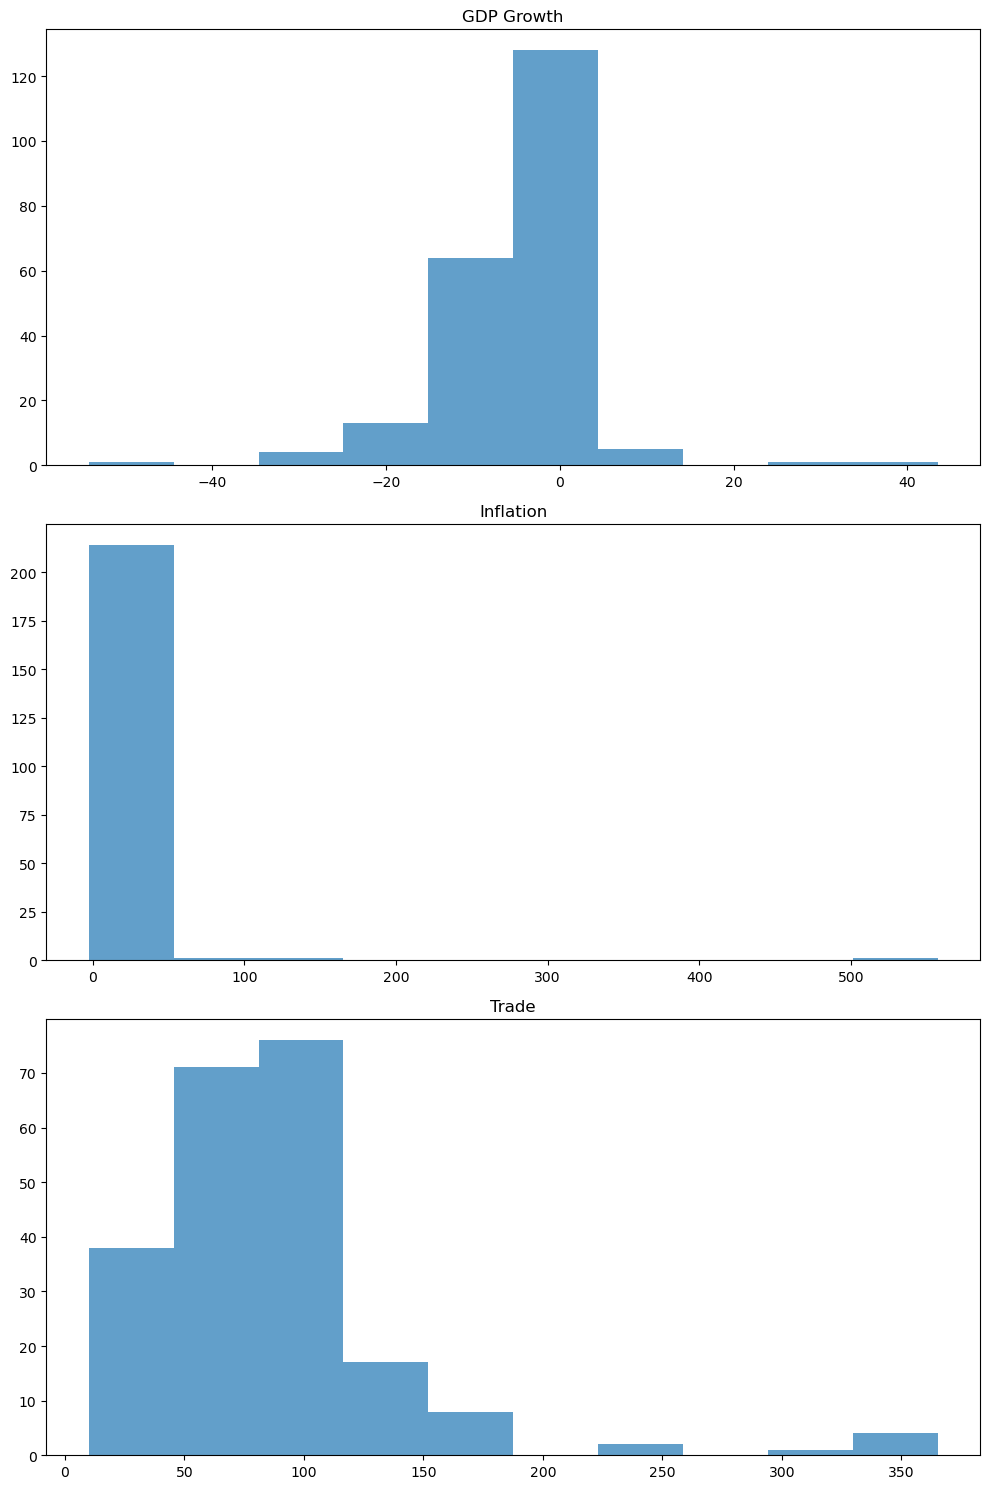

In [25]:
import matplotlib.pyplot as plt


# Creating subplots with 3 histograms
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Histogram for GDP growth
axs[0].hist(df1['GDP'], bins=10, alpha=0.7)
axs[0].set_title('GDP Growth')

# Histogram for inflation
axs[1].hist(df1['Inflation'], bins=10, alpha=0.7)
axs[1].set_title('Inflation')

# Histogram for trade
axs[2].hist(df1['Trade'], bins=10, alpha=0.7)
axs[2].set_title('Trade')

# Adjusting the spacing between plots and displaying the histogram
plt.tight_layout()
plt.show()


# MEAN

In [26]:
# Calculate the avreage of each columns while
# excluding the null values referred by '..'.

# Iterate over the cells and calculate their sum
# while incrementing a counter to track the number of
# rows containing values then deviding the sum by the counter

# Calculate the avg of GDP
sum_GDP = 0
i = 0
for value in df['GDP']:
    sum_GDP += value
    i+=1
avg_GDP = sum_GDP/i

# Calculate the avg of Inflation
sum_Inflation = 0
j = 0
for value in df['Inflation']:
    sum_Inflation += value
    j+=1
avg_Inflation = sum_Inflation/j

# Calculate the avg of Trade
sum_Trade = 0
k = 0
for value in df['Trade']:
    sum_Trade += value
    k+=1
avg_Trade = sum_Trade/k

print("GDP mean:", avg_GDP)
print("Inflation mean:", avg_Inflation)
print("Trade mean:", avg_Trade)

GDP mean: -5.065449234361874
Inflation mean: 8.05742351264714
Trade mean: 84.36905428635447


# MODE

In [27]:
# Calculating the mode involves finding the value or values that appear most frequently in a dataset
frequency = {}
max_frequency = 0
modes = []
# find the occ of every value
# the modes are the values that have the maximum frequencies
for value in df1['GDP']:
    frequency[value] = frequency.get(value, 0) + 1
    if frequency[value] > max_frequency:
        max_frequency = frequency[value]

for value, freq in frequency.items():
    if freq == max_frequency:
        modes.append(value)

print('GDP mode:' , modes)


frequency = {}
max_frequency = 0
modes = []
# find the occ of every value
# the modes are the values that have the maximum frequencies
for value in df1['Inflation']:
    frequency[value] = frequency.get(value, 0) + 1
    if frequency[value] > max_frequency:
        max_frequency = frequency[value]

for value, freq in frequency.items():
    if freq == max_frequency:
        modes.append(value)

print('Inflation mode:' , modes)



frequency = {}
max_frequency = 0
modes = []
# find the occ of every value
# the modes are the values that have the maximum frequencies
for value in df1['Trade']:
    frequency[value] = frequency.get(value, 0) + 1
    if frequency[value] > max_frequency:
        max_frequency = frequency[value]

for value, freq in frequency.items():
    if freq == max_frequency:
        modes.append(value)

print('Trade mode:' , modes)




GDP mode: [-5.065449234361873]
Inflation mode: [8.057423512647146]
Trade mode: [84.36905428635443]


# MEDIAN

In [28]:
# Sort the GDP Values from lowest to highest
# identify the meddile value (the median)  if the dataset has odd nuber of values
# if the dataset has even number of values the median is the avg of the 2 middle alues

median = 0
sorted_GDP = sorted(df1['GDP'])
if (len(sorted_GDP)% 2 == 1):
    median =sorted_GDP[len(sorted_GDP) // 2]
else:
    median =(sorted_GDP[(len(sorted_GDP) // 2) - 1] + sorted_GDP[(len(sorted_GDP) // 2)]) / 2
print('GDP median', median)


medianI = 0
sorted_Inflation = sorted(df1['Inflation'])
if (len(sorted_Inflation)% 2 == 1):
    medianI =sorted_Inflation[len(sorted_Inflation) // 2]
else:
    medianI =(sorted_Inflation[(len(sorted_Inflation) // 2) - 1] + sorted_Inflation[(len(sorted_Inflation) // 2)]) / 2
print('Inflation median' ,medianI)



medianT = 0
sorted_Trade = sorted(df1['Trade'])
if (len(sorted_Trade)% 2 == 1):
    medianT =sorted_Trade[len(sorted_Trade) // 2]
else:
    medianT =(sorted_Trade[(len(sorted_Trade) // 2) - 1] + sorted_Trade[(len(sorted_Trade) // 2)]) / 2
print('Trade median',medianT)

GDP median -4.273354321614619
Inflation median 3.16129528497808
Trade median 80.39830505986029


# Variance

In [29]:
## to calculate the variance we should :
### Find the average of all values in the dataset
### For each value, subtract the mean and square the result.
### Sum all the squared differences and divide by the total number of values in the dataset.



sum = 0
for value in df1['GDP']:
    sum += (value - avg_GDP)*(value - avg_GDP)
variance = sum / len(df1['GDP'])
print('GDP VARIANCE',variance)


sum1 = 0
for value in df1['Inflation']:
    sum1 += (value - avg_Inflation)*(value - avg_Inflation)
variance1 = sum1 / len(df1['Inflation'])
print('Inflation VARIANCE',variance1)


sum2 = 0
for value in df1['Trade']:
    sum2 += (value - avg_Trade)*(value - avg_Trade)
variance2 = sum2 / len(df1['Trade'])
print('Trade VARIANCE',variance2)


    
    

GDP VARIANCE 69.2870904976362
Inflation VARIANCE 1569.4014160246084
Trade VARIANCE 2789.6205364412262


# Standard Deviation

In [30]:
#The standard deviation is the square root of the variance.
import numpy as np
print('GDP Standard Deviation',np.sqrt(variance))
print('Inflation Standard Deviation',np.sqrt(variance1))
print('Trade Standard Deviation',np.sqrt(variance2))



GDP Standard Deviation 8.323886742239841
Inflation Standard Deviation 39.61567134385846
Trade Standard Deviation 52.81685844918482


# Variation Coefficient

In [31]:
#the Coefficient of Variation is the standard deviation devided by the mean, then multiplied   by 100 to express it as a percentage.

print('GDP Variation Coefficient',((np.sqrt(variance)) / avg_GDP) * 100)
print('Inflation Variation Coefficient',((np.sqrt(variance1)) / avg_Inflation) * 100)
print('Trade Variation Coefficient',((np.sqrt(variance2)) / avg_Trade) * 100)






GDP Variation Coefficient -164.32672320105587
Inflation Variation Coefficient 491.6667379054442
Trade Variation Coefficient 62.60216959398491


# Skewness

In [32]:
import scipy.stats as stats

# Calculate skewness for GDP growth
gdp_growth_skewness = stats.skew(df1['GDP'])
print("Skewness of GDP growth:", gdp_growth_skewness)

# Calculate skewness for inflation
inflation_skewness = stats.skew(df1['Inflation'])
print("Skewness of inflation:", inflation_skewness)

# Calculate skewness for trade
trade_skewness = stats.skew(df1['Trade'])
print("Skewness of trade:", trade_skewness)

Skewness of GDP growth: -0.3324246951048427
Skewness of inflation: 12.585050435975772
Skewness of trade: 2.8519145629079916


In [34]:
# Calculate kurtosis for GDP growth
gdp_growth_kurtosis = stats.kurtosis(df1['GDP'])
print("Kurtosis of GDP growth:", gdp_growth_kurtosis)

# Calculate kurtosis for inflation
inflation_kurtosis = stats.kurtosis(df1['Inflation'])
print("Kurtosis of inflation:", inflation_kurtosis)

# Calculate kurtosis for trade
trade_kurtosis = stats.kurtosis(df1['Trade'])
print("Kurtosis of trade:", trade_kurtosis)

Kurtosis of GDP growth: 12.028867694003246
Kurtosis of inflation: 168.29815134511142
Kurtosis of trade: 11.071567478101187
